In [12]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [13]:
dengue = pd.read_csv('dengue.csv')

In [14]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [15]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [16]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1>Correlation-Based Insights</h1>

<h1>1. Correlation between Dengue Cases and Deaths
</h1>

Correlation between Dengue Cases and Deaths: 0.04


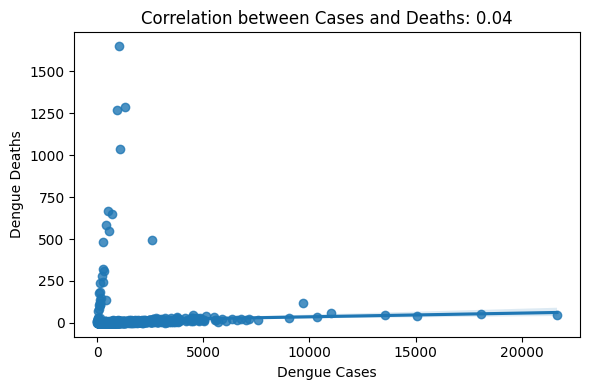

In [25]:
correlation = dengue['Dengue_Cases'].corr(dengue['Dengue_Deaths'])
print(f"Correlation between Dengue Cases and Deaths: {correlation:.2f}")

plt.figure(figsize=(6, 4))
sns.regplot(data=dengue, x='Dengue_Cases', y='Dengue_Deaths')
plt.title(f'Correlation between Cases and Deaths: {correlation:.2f}')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.tight_layout()
plt.show()

<h1>2. Monthly Dengue Cases vs. Deaths Correlation

</h1>

Month                  
January    Dengue_Cases    0.723676
February   Dengue_Cases    0.773009
March      Dengue_Cases    0.714770
April      Dengue_Cases    0.652853
May        Dengue_Cases    0.730039
June       Dengue_Cases    0.779158
July       Dengue_Cases    0.886377
August     Dengue_Cases    0.879364
September  Dengue_Cases   -0.056543
October    Dengue_Cases   -0.102612
November   Dengue_Cases    0.227237
December   Dengue_Cases    0.872277
Name: Dengue_Deaths, dtype: float64


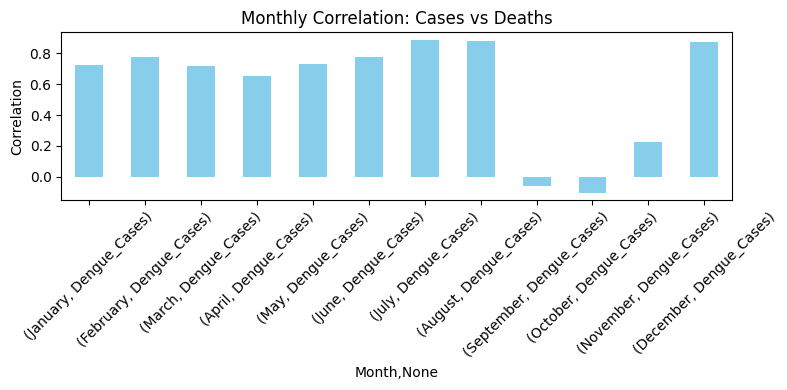

In [26]:
monthly_corr = dengue.groupby('Month')[['Dengue_Cases', 'Dengue_Deaths']].corr().iloc[0::2, -1]
print(monthly_corr)

plt.figure(figsize=(8, 4))
monthly_corr.plot(kind='bar', color='skyblue')
plt.title('Monthly Correlation: Cases vs Deaths')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>3. Regional Correlation Between Cases and Deaths

</h1>

Region                   
BARMM        Dengue_Cases   -0.056232
CAR          Dengue_Cases   -0.019237
NCR          Dengue_Cases   -0.060607
Region I     Dengue_Cases    0.784995
Region II    Dengue_Cases    0.775524
Region III   Dengue_Cases    0.727460
Region IV-A  Dengue_Cases    0.853611
Region IV-B  Dengue_Cases    0.525196
Region IX    Dengue_Cases    0.013137
Region V     Dengue_Cases    0.817475
Region VI    Dengue_Cases    0.002393
Region VII   Dengue_Cases    0.021914
Region VIII  Dengue_Cases   -0.017929
Region X     Dengue_Cases   -0.109215
Region XI    Dengue_Cases   -0.004509
Region XII   Dengue_Cases   -0.006207
Region XIII  Dengue_Cases   -0.089303
Name: Dengue_Deaths, dtype: float64


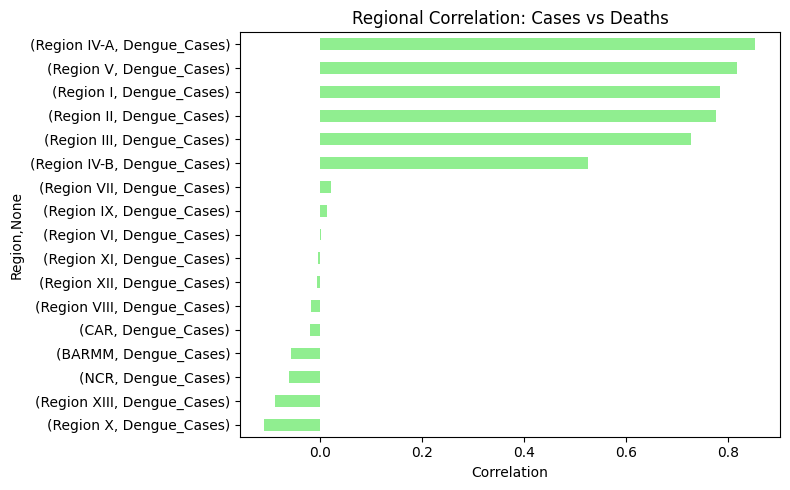

In [27]:
regional_corr = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].corr().iloc[0::2, -1]
print(regional_corr)

plt.figure(figsize=(8, 5))
regional_corr.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Regional Correlation: Cases vs Deaths')
plt.xlabel('Correlation')
plt.tight_layout()
plt.show()

<h1>4. Yearly Average Case-to-Death Ratio

</h1>

Year
2016    0.064067
2017    0.068404
2018    0.005783
2019    0.004489
2020    0.057904
Name: CFR, dtype: float64


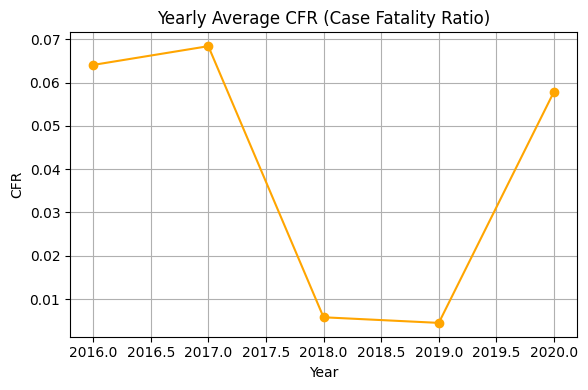

In [28]:
dengue['CFR'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases'].replace(0, pd.NA)
yearly_cfr = dengue.groupby('Year')['CFR'].mean()
print(yearly_cfr)

plt.figure(figsize=(6, 4))
yearly_cfr.plot(marker='o', linestyle='-', color='orange')
plt.title('Yearly Average CFR (Case Fatality Ratio)')
plt.xlabel('Year')
plt.ylabel('CFR')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>5. Lagged Correlation (Previous Month Cases vs. Current Deaths)

</h1>

Lagged Correlation (Prev Month Cases vs. Deaths): 0.07


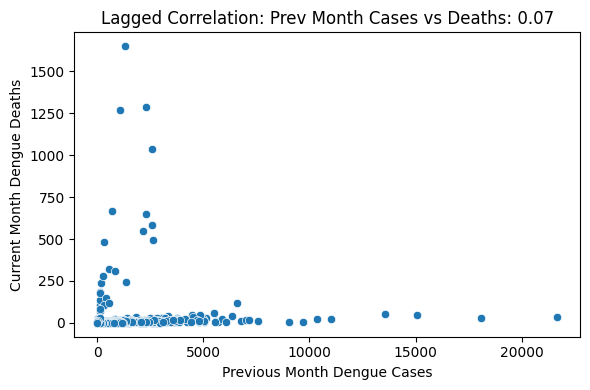

In [29]:
dengue_sorted = dengue.sort_values(['Region', 'Year', 'Month'])
dengue_sorted['Prev_Cases'] = dengue_sorted.groupby('Region')['Dengue_Cases'].shift(1)
lag_corr = dengue_sorted[['Prev_Cases', 'Dengue_Deaths']].corr().iloc[0, 1]
print(f"Lagged Correlation (Prev Month Cases vs. Deaths): {lag_corr:.2f}")

plt.figure(figsize=(6, 4))
sns.scatterplot(data=dengue_sorted, x='Prev_Cases', y='Dengue_Deaths')
plt.title(f'Lagged Correlation: Prev Month Cases vs Deaths: {lag_corr:.2f}')
plt.xlabel('Previous Month Dengue Cases')
plt.ylabel('Current Month Dengue Deaths')
plt.tight_layout()
plt.show()

<h1>Comparative Insights Summary</h1>

<h1>6. Regions with Highest vs. Lowest Case Counts

</h1>

Region with Highest Total Cases: Region IV-A
Region with Lowest Total Cases: BARMM


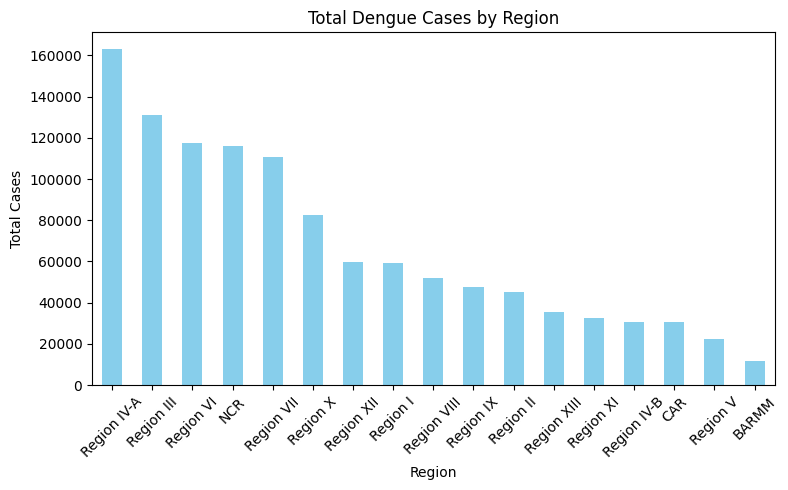

In [30]:
region_case_totals = dengue.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)
print("Region with Highest Total Cases:", region_case_totals.idxmax())
print("Region with Lowest Total Cases:", region_case_totals.idxmin())

plt.figure(figsize=(8, 5))
region_case_totals.plot(kind='bar', color='skyblue')
plt.title('Total Dengue Cases by Region')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>7. Region with Highest Case Fatality Rate (CFR)</h1>

Region with Highest Case Fatality Rate: Region XII


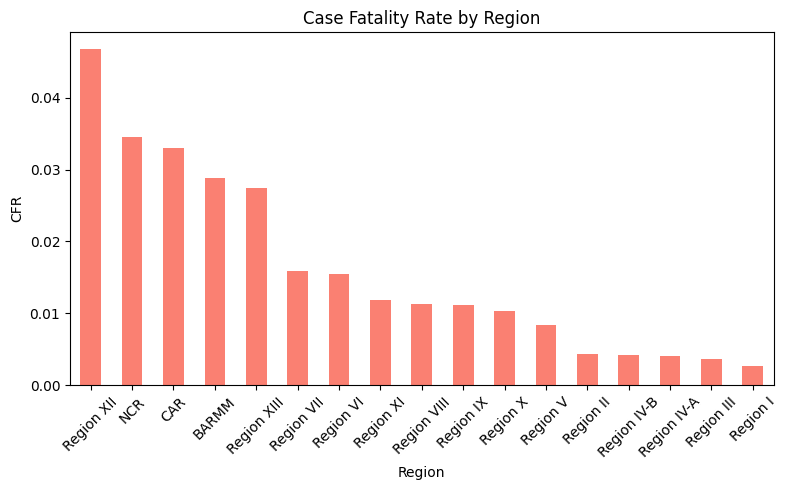

In [33]:
region_deaths = dengue.groupby('Region')['Dengue_Deaths'].sum()
region_cfr = (region_deaths / region_case_totals).sort_values(ascending=False)
print("Region with Highest Case Fatality Rate:", region_cfr.idxmax())

plt.figure(figsize=(8, 5))
region_cfr.plot(kind='bar', color='salmon')
plt.title('Case Fatality Rate by Region')
plt.ylabel('CFR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h1>8. Monthly Case Comparison Across Years</h1>

Monthly Dengue Cases Comparison Across Years:
Month  January  February  March  April    May   June   July  August  \
Year                                                                  
2016     17052     12386   9300   7269   8092  10831  29744   36195   
2017     15623      9872   7696   6343   4853   7589  18340   25039   
2018     12657     10466   7944   6860   6594  11502  30363   34210   
2019     20672     25494  19798   9252  10387  25523  55220   85038   
2020     18324     19583  12838   2784   2461   2665   4575    7072   

Month  September  October  November  December  
Year                                           
2016       26990    21943     16252     13490  
2017       17753    15259     12553     13235  
2018       38617    30026     30191     31353  
2019       89642    46382     30097     24397  
2020        4941     4035      5807      5956  


<Figure size 1000x600 with 0 Axes>

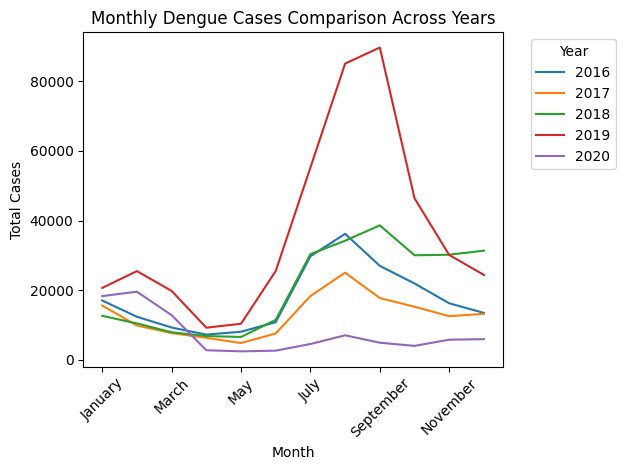

In [34]:
monthly_case_trend = dengue.groupby(['Year', 'Month'])['Dengue_Cases'].sum().unstack().fillna(0)
print("Monthly Dengue Cases Comparison Across Years:")
print(monthly_case_trend)

plt.figure(figsize=(10, 6))
monthly_case_trend.T.plot()
plt.title('Monthly Dengue Cases Comparison Across Years')
plt.ylabel('Total Cases')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h1>9. Death Rate Comparison Across Regions per Year</h1>

Average Case Fatality Rate (CFR) by Region and Year:
Year             2016      2017      2018      2019      2020
Region                                                       
BARMM        0.196565  0.003938  0.014692  0.006654  0.106828
CAR          0.188542  0.002408  0.001222  0.002825  0.153670
NCR          0.219728  0.006310  0.005703  0.004833  0.234062
Region I     0.002864  0.003648  0.003437  0.002466  0.006984
Region II    0.003004  0.006239  0.003604  0.004320  0.004391
Region III   0.002431  0.003533  0.002555  0.003671  0.004236
Region IV-A  0.004146  0.004365  0.005403  0.004098  0.005136
Region IV-B  0.005286  0.004743  0.006097  0.002731  0.004102
Region IX    0.005801  0.224032  0.007934  0.004990  0.008038
Region V     0.005539  0.007409  0.010082  0.010618  0.015076
Region VI    0.003212  0.200655  0.006803  0.004599  0.004972
Region VII   0.008341  0.139411  0.006512  0.006030  0.005577
Region VIII  0.007382  0.202550  0.006507  0.003910  0.002980
Region X     0.00

<Figure size 1000x600 with 0 Axes>

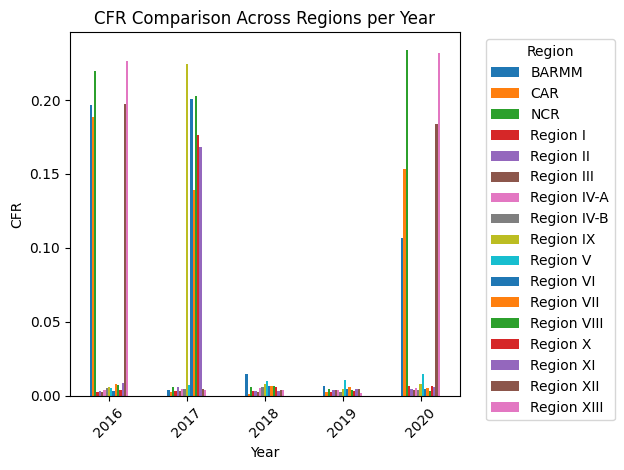

In [35]:
dengue['CFR'] = dengue['Dengue_Deaths'] / dengue['Dengue_Cases'].replace(0, pd.NA)
region_year_cfr = dengue.groupby(['Region', 'Year'])['CFR'].mean().unstack()
print("Average Case Fatality Rate (CFR) by Region and Year:")
print(region_year_cfr)

plt.figure(figsize=(10, 6))
region_year_cfr.T.plot(kind='bar')
plt.title('CFR Comparison Across Regions per Year')
plt.ylabel('CFR')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h1>10. Compare Peak Month of Cases vs. Deaths</h1>

Peak Case Months by Year:
    Year      Month
7   2016     August
19  2017     August
32  2018  September
44  2019  September
49  2020   February

Peak Death Months by Year:
    Year      Month
9   2016    October
21  2017    October
32  2018  September
44  2019  September
56  2020  September


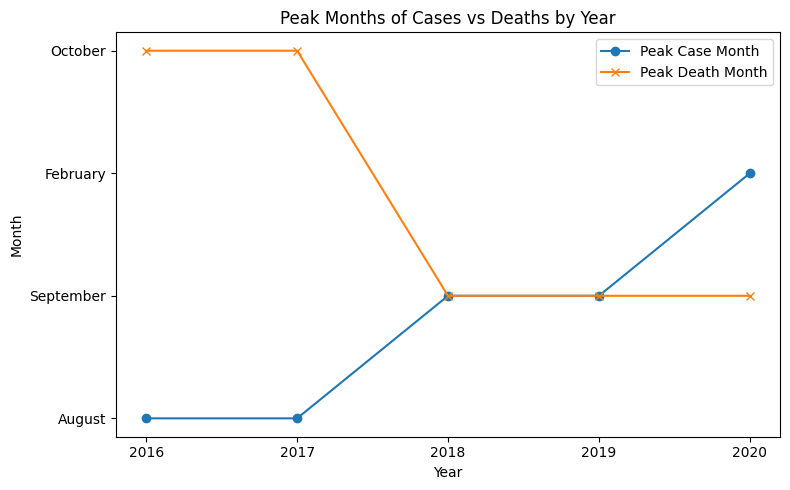

In [36]:
# Peak case month per year
peak_cases = dengue.groupby(['Year', 'Month'])['Dengue_Cases'].sum().reset_index()
peak_deaths = dengue.groupby(['Year', 'Month'])['Dengue_Deaths'].sum().reset_index()

# Get the month with highest cases and deaths each year
peak_case_months = peak_cases.loc[peak_cases.groupby('Year')['Dengue_Cases'].idxmax()][['Year', 'Month']]
peak_death_months = peak_deaths.loc[peak_deaths.groupby('Year')['Dengue_Deaths'].idxmax()][['Year', 'Month']]

print("Peak Case Months by Year:")
print(peak_case_months)

print("\nPeak Death Months by Year:")
print(peak_death_months)

plt.figure(figsize=(8, 5))
plt.plot(peak_case_months['Year'], peak_case_months['Month'], marker='o', label='Peak Case Month')
plt.plot(peak_death_months['Year'], peak_death_months['Month'], marker='x', label='Peak Death Month')
plt.title('Peak Months of Cases vs Deaths by Year')
plt.ylabel('Month')
plt.xlabel('Year')
plt.legend()
plt.xticks(peak_case_months['Year'])
plt.tight_layout()
plt.show()

<h1>11. Yearly Trend of Dengue Cases</h1>

Yearly Dengue Cases:
Year
2016    209544
2017    154155
2018    250783
2019    441902
2020     91041
Name: Dengue_Cases, dtype: int64


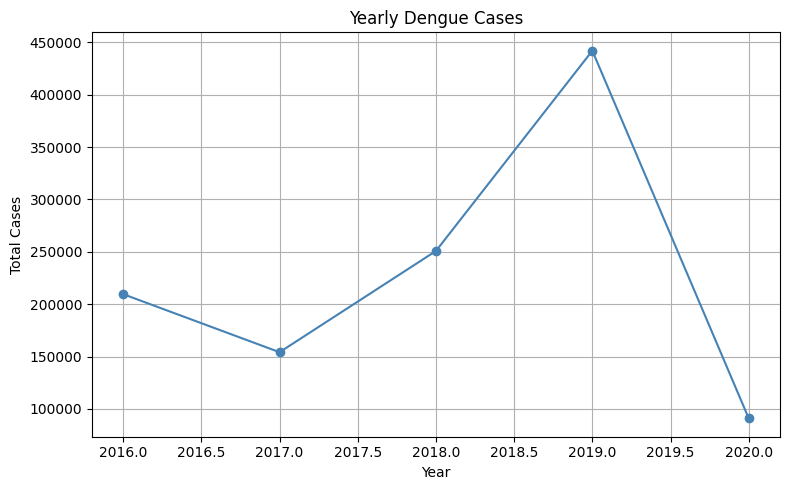

In [37]:
yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum()
print("Yearly Dengue Cases:")
print(yearly_cases)

plt.figure(figsize=(8, 5))
yearly_cases.plot(marker='o', color='steelblue')
plt.title('Yearly Dengue Cases')
plt.ylabel('Total Cases')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>12. Yearly Trend of Dengue Deaths</h1>

Yearly Dengue Deaths:
Year
2016    8127
2017    4563
2018    1226
2019    1733
2020    1195
Name: Dengue_Deaths, dtype: int64


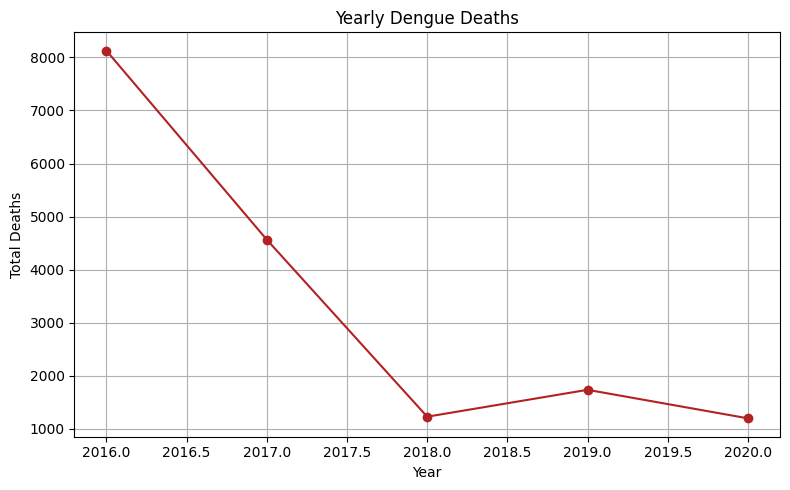

In [38]:
yearly_deaths = dengue.groupby('Year')['Dengue_Deaths'].sum()
print("Yearly Dengue Deaths:")
print(yearly_deaths)

plt.figure(figsize=(8, 5))
yearly_deaths.plot(marker='o', color='firebrick')
plt.title('Yearly Dengue Deaths')
plt.ylabel('Total Deaths')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1> 13. Seasonality of Dengue Cases</h1>

Average Cases by Month (Seasonality):
Month
January       992.094118
February      915.305882
March         677.364706
April         382.447059
May           381.023529
June          683.647059
July         1626.376471
August       2206.517647
September    2093.447059
October      1384.058824
November     1116.470588
December     1040.364706
Name: Dengue_Cases, dtype: float64


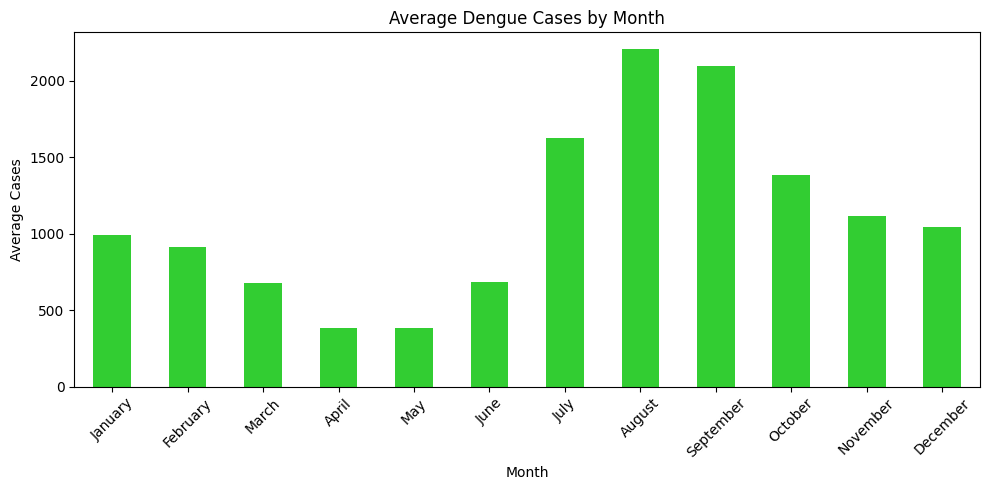

In [39]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)
monthly_avg_cases = dengue.groupby('Month')['Dengue_Cases'].mean()
print("Average Cases by Month (Seasonality):")
print(monthly_avg_cases)

plt.figure(figsize=(10, 5))
monthly_avg_cases.plot(kind='bar', color='limegreen')
plt.title('Average Dengue Cases by Month')
plt.ylabel('Average Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1>14. Rolling Average of Cases/Deaths (3-month window)</h1>

     Year    Month  Cases_Rolling  Deaths_Rolling
0    2016  January     705.000000        1.000000
60   2016  January     682.000000        1.500000
120  2016  January    1113.333333        2.000000
180  2016  January    1876.000000        6.333333
240  2016  January    1724.000000        6.000000
300  2016  January    1144.333333        5.000000
360  2016  January     470.333333        0.666667
420  2016  January     966.000000        3.666667
480  2016  January    1043.333333        5.000000
540  2016  January     918.333333        5.333333


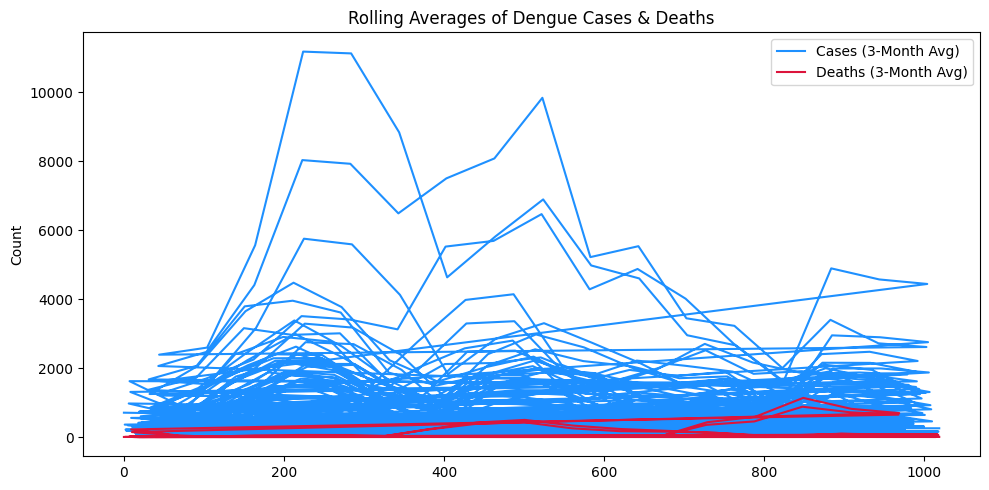

In [40]:
dengue_sorted = dengue.sort_values(['Year', 'Month'])
dengue_sorted['Cases_Rolling'] = dengue_sorted['Dengue_Cases'].rolling(window=3, min_periods=1).mean()
dengue_sorted['Deaths_Rolling'] = dengue_sorted['Dengue_Deaths'].rolling(window=3, min_periods=1).mean()
print(dengue_sorted[['Year', 'Month', 'Cases_Rolling', 'Deaths_Rolling']].head(10))

plt.figure(figsize=(10, 5))
plt.plot(dengue_sorted['Cases_Rolling'], label='Cases (3-Month Avg)', color='dodgerblue')
plt.plot(dengue_sorted['Deaths_Rolling'], label='Deaths (3-Month Avg)', color='crimson')
plt.title('Rolling Averages of Dengue Cases & Deaths')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

<h1>15. Region-Specific Yearly Growth Rates in Cases</h1>

Region-wise Yearly Growth in Dengue Cases (%):
Year         2016    2017    2018    2019   2020
Region                                          
BARMM         0.0  -77.86  407.22  119.23 -81.31
CAR           0.0  -55.86   87.49   16.14 -88.86
NCR           0.0  100.76   11.86   38.62 -82.25
Region I      0.0   -0.54   88.33   28.08 -63.90
Region II     0.0   36.47  232.92   -5.91 -90.21
Region III    0.0   20.06   25.90   17.12 -56.96
Region IV-A   0.0   -7.66   35.63  150.56 -87.24
Region IV-B   0.0  -30.73  189.49   36.97 -53.78
Region IX     0.0  -40.76   44.15  345.50 -90.22
Region V      0.0   27.37   10.02  214.01 -84.55
Region VI     0.0  -64.53   89.40  243.29 -93.16
Region VII    0.0  -45.77   37.32   41.87 -60.05
Region VIII   0.0  -27.32  180.29  144.82 -82.02
Region X      0.0  -62.22  251.80   20.68 -78.05
Region XI     0.0  -69.79   72.24   34.04 -77.13
Region XII    0.0  -39.97   -4.58  125.01 -78.86
Region XIII   0.0  -58.59  202.98   33.15 -66.96


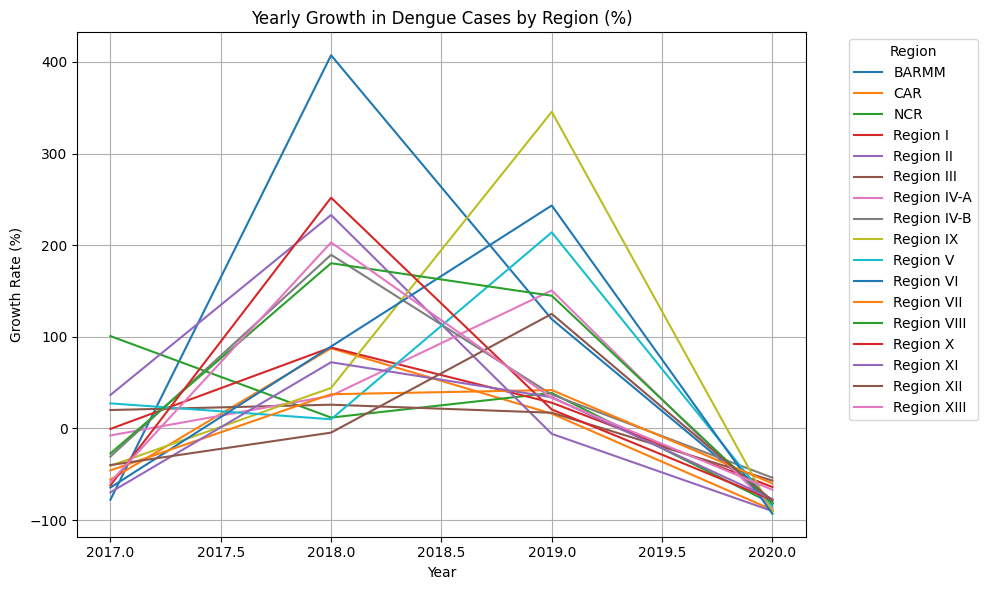

In [41]:
region_year_cases = dengue.groupby(['Region', 'Year'])['Dengue_Cases'].sum().unstack()
region_growth = region_year_cases.pct_change(axis=1) * 100  # percentage growth
print("Region-wise Yearly Growth in Dengue Cases (%):")
print(region_growth.round(2).fillna(0))

region_growth.T.plot(figsize=(10, 6))
plt.title('Yearly Growth in Dengue Cases by Region (%)')
plt.ylabel('Growth Rate (%)')
plt.xlabel('Year')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>Descriptive Stats</h1>

<h1>16. Total dengue cases and deaths</h1>

Total Cases: 1147425, Total Deaths: 16844


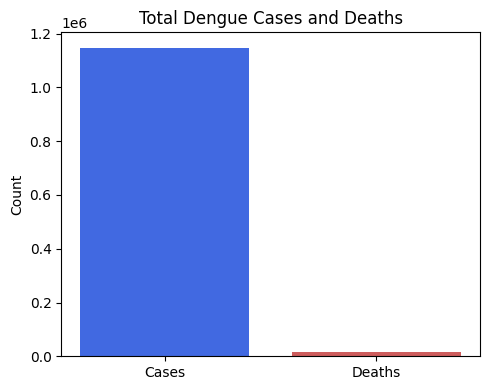

In [42]:
total_cases = dengue['Dengue_Cases'].sum()
total_deaths = dengue['Dengue_Deaths'].sum()
print(f"Total Cases: {total_cases}, Total Deaths: {total_deaths}")

plt.figure(figsize=(5, 4))
plt.bar(['Cases', 'Deaths'], [total_cases, total_deaths], color=['royalblue', 'indianred'])
plt.title('Total Dengue Cases and Deaths')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<h1>17.Mean/Median/Std per Region</h1>

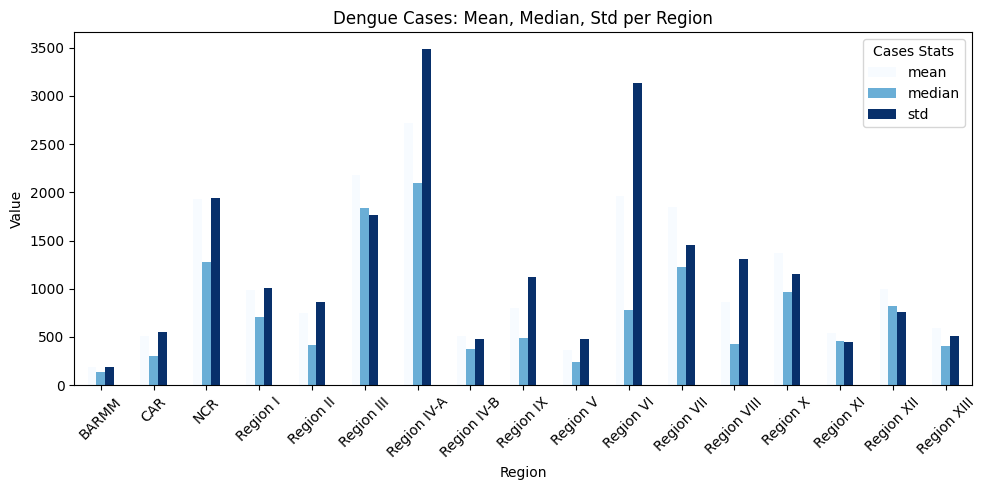

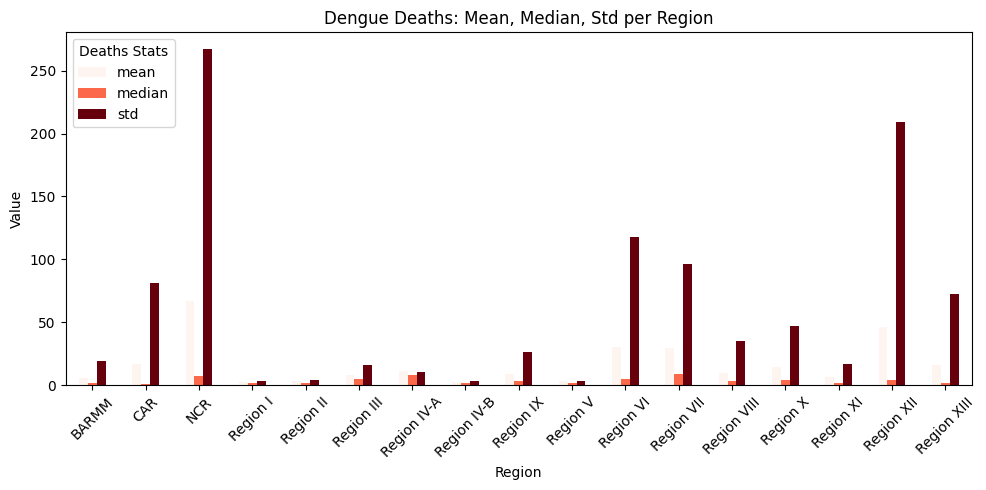

In [50]:
region_stats = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].agg(['mean', 'median', 'std'])

# Plot for Dengue Cases
region_stats['Dengue_Cases'].plot(kind='bar', figsize=(10, 5), colormap='Blues')
plt.title('Dengue Cases: Mean, Median, Std per Region')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Cases Stats')
plt.tight_layout()
plt.show()

# Plot for Dengue Deaths
region_stats['Dengue_Deaths'].plot(kind='bar', figsize=(10, 5), colormap='Reds')
plt.title('Dengue Deaths: Mean, Median, Std per Region')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Deaths Stats')
plt.tight_layout()
plt.show()



<h1>18.Monthly averages across years</h1>

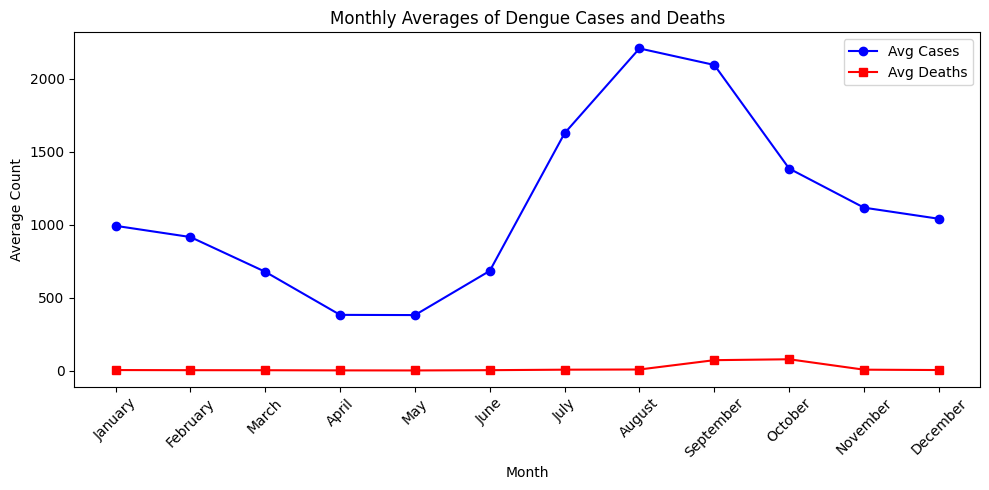

In [52]:
# Ensure correct month ordering
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

# Monthly averages
monthly_averages = dengue.groupby('Month')[['Dengue_Cases', 'Dengue_Deaths']].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_averages.index, monthly_averages['Dengue_Cases'], marker='o', label='Avg Cases', color='blue')
plt.plot(monthly_averages.index, monthly_averages['Dengue_Deaths'], marker='s', label='Avg Deaths', color='red')
plt.title('Monthly Averages of Dengue Cases and Deaths')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<h1>19.Max/Min cases in a month</h1>

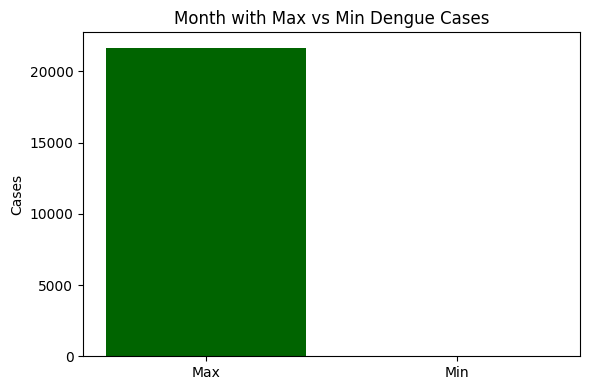

Month with Max Cases:
 Month              September
Year                    2019
Region           Region IV-A
Dengue_Cases           21658
Dengue_Deaths             48
CFR                 0.002216
Name: 224, dtype: object

Month with Min Cases:
 Month                October
Year                    2020
Region           Region XIII
Dengue_Cases              10
Dengue_Deaths             14
CFR                      1.4
Name: 837, dtype: object


In [56]:
max_row = dengue.loc[dengue['Dengue_Cases'].idxmax()]
min_row = dengue.loc[dengue['Dengue_Cases'].idxmin()]

# Plot
plt.figure(figsize=(6, 4))
plt.bar(['Max', 'Min'], [max_row['Dengue_Cases'], min_row['Dengue_Cases']], color=['darkgreen', 'darkorange'])
plt.title('Month with Max vs Min Dengue Cases')
plt.ylabel('Cases')
plt.tight_layout()
plt.show()

# Print details
print("Month with Max Cases:\n", max_row)
print("\nMonth with Min Cases:\n", min_row)


<h1>20.Month with highest deaths</h1>

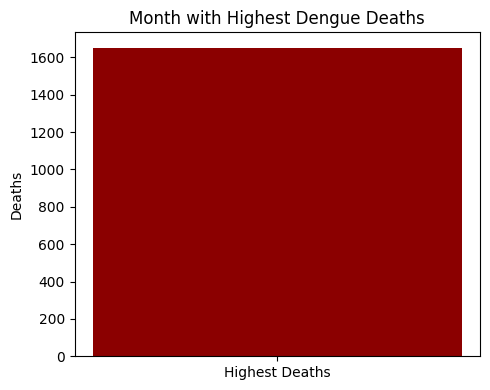

Month with Highest Deaths:
        Month  Year Region  Dengue_Cases  Dengue_Deaths       CFR
849  October  2016    NCR          1033           1651  1.598258


In [55]:
max_deaths_row = dengue[dengue['Dengue_Deaths'] == dengue['Dengue_Deaths'].max()]

# Plot
plt.figure(figsize=(5, 4))
plt.bar(['Highest Deaths'], [max_deaths_row['Dengue_Deaths'].values[0]], color='darkred')
plt.title('Month with Highest Dengue Deaths')
plt.ylabel('Deaths')
plt.tight_layout()
plt.show()

# Print details
print("Month with Highest Deaths:\n", max_deaths_row)
